# Spotify Top 50 Analysis

# import librarys

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import  seaborn as sns
import warnings
#import DataFrame as df
#warinings.filterwarnings('ignore')
#%matplotlib inline

# About

# 1)Id an arbitrary unique track identifier

* Track.Name           :track title
* Artist.Name          : singer or band
* Genre                :genre of the track (and the target variable for this proble)
* bpm(Beats.Per.Minute): beats per minute (tempo)
* Energy               : the higher the value the more energetic
* Danceability         : the higher the value, the easier it is to dance to this song
* Loudness (dB)        : the higher the value, the louder the song
* Liveness             : the higher the value, the more likely the song is a live recording
* Valence              : the higher the value, the more positive mood for the song
* Duration             : the length of the song
* Acousticness         : the higher the value the more acoustic
* Speechiness          : the higher the value the more spoken word the song contains
* popularity           : the higher the value the more popular .

In [3]:
go=pd.read_csv('top.csv')
go.shape

(50, 14)

In [4]:
go.head(5)

,Unnamed: 0,Track Name,Artist Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness,Liveness,Valence,Length(per second),Acousticness,Speechiness,Popularity
0,1,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [19]:
go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          50 non-null     int64 
 1   Track Name          50 non-null     object
 2   Artist Name         50 non-null     object
 3   Genre               50 non-null     object
 4   Beats.Per.Minute    50 non-null     int64 
 5   Energy              50 non-null     int64 
 6   Danceability        50 non-null     int64 
 7   Loudness            50 non-null     int64 
 8   Liveness            50 non-null     int64 
 9   Valence             50 non-null     int64 
 10  Length(per second)  50 non-null     int64 
 11  Acousticness        50 non-null     int64 
 12  Speechiness         50 non-null     int64 
 13  Popularity          50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [7]:
go.tail(5)

,Unnamed: 0,Track Name,Artist Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness,Liveness,Valence,Length(per second),Acousticness,Speechiness,Popularity
45,46,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88
46,47,Te Robar�,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
47,48,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
48,49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [8]:
go.columns

Index(['Unnamed: 0', 'Track Name', 'Artist Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence',
       'Length(per second)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [12]:
go.count()

Unnamed: 0            50
Track Name            50
Artist Name           50
Genre                 50
Beats.Per.Minute      50
Energy                50
Danceability          50
Loudness              50
Liveness              50
Valence               50
Length(per second)    50
Acousticness          50
Speechiness           50
Popularity            50
dtype: int64

In [13]:
go.sample(10)

,Unnamed: 0,Track Name,Artist Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness,Liveness,Valence,Length(per second),Acousticness,Speechiness,Popularity
46,47,Te Robar�,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
34,35,Never Really Over,Katy Perry,dance pop,100,88,77,-5,32,39,224,19,6,89
26,27,Dance Monkey,Tones and I,australian pop,98,59,82,-6,18,54,210,69,10,83
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
37,38,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
17,18,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91
12,13,Someone You Loved,Lewis Capaldi,pop,110,41,50,-6,11,45,182,75,3,88
18,19,Lalala,Y2K,canadian hip hop,130,39,84,-8,14,50,161,18,8,88
16,17,LA CANCI�N,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90


In [14]:
go.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness,Liveness,Valence,Length(per second),Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [15]:
go.isnull().sum()

Unnamed: 0            0
Track Name            0
Artist Name           0
Genre                 0
Beats.Per.Minute      0
Energy                0
Danceability          0
Loudness              0
Liveness              0
Valence               0
Length(per second)    0
Acousticness          0
Speechiness           0
Popularity            0
dtype: int64

In [17]:
print(go.dtypes)

Unnamed: 0             int64
Track Name            object
Artist Name           object
Genre                 object
Beats.Per.Minute       int64
Energy                 int64
Danceability           int64
Loudness               int64
Liveness               int64
Valence                int64
Length(per second)     int64
Acousticness           int64
Speechiness            int64
Popularity             int64
dtype: object


#  Analysing the relationship between energy and loudness

## Calculating the number of songs by each of the artists

In [31]:
print(go.groupby('Artist Name').size())
popular_artist = go.groupby('Artist Name').size()
print(popular_artist)
artist_list = go['Artist Name'].values.tolist()

Artist Name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSAL�A             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64
Artist Name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown      

In [4]:
go.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness,Liveness,Valence,Length(per second),Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


# Correlation

In [38]:
pd.set_option('display.width', 100)
pd.set_option('precision',3)
corr = go.corr(method='spearman')
print(corr)

                    Unnamed: 0  Beats.Per.Minute  Energy  Danceability  Loudness  Liveness  \
Unnamed: 0               1.000            -0.263   0.132         0.053    -0.014     0.102   
Beats.Per.Minute        -0.263             1.000   0.012        -0.092     0.014    -0.033   
Energy                   0.132             0.012   1.000        -0.049     0.635     0.013   
Danceability             0.053            -0.092  -0.049         1.000     0.009    -0.261   
Loudness                -0.014             0.014   0.635         0.009     1.000     0.114   
Liveness                 0.102            -0.033   0.013        -0.261     0.114     1.000   
Valence                  0.113            -0.048   0.467         0.155     0.317    -0.187   
Length(per second)       0.045            -0.198   0.189        -0.079     0.165     0.202   
Acousticness             0.058            -0.010  -0.211        -0.128    -0.040     0.204   
Speechiness             -0.232             0.392  -0.035    

<AxesSubplot:>

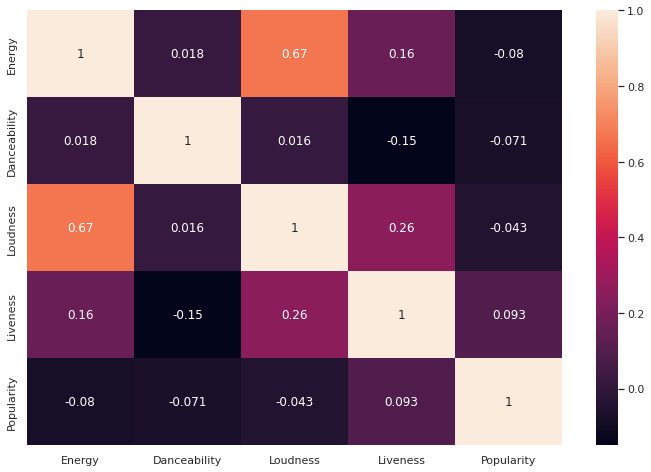

In [25]:
corr = go[['Genre','Energy','Danceability','Loudness','Liveness','Popularity']].corr()

# Boxplot for Popularity by Genre

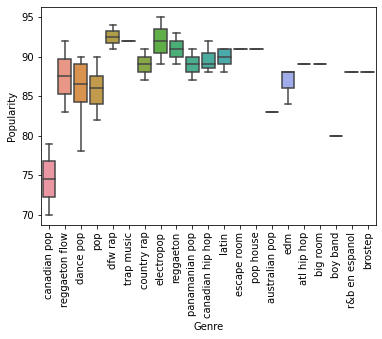

In [10]:
ac=sns.boxplot(y='Popularity',x='Genre',data=go)
plt.xticks(rotation='vertical')
plt.show()

* Boxplot for Popularity by Genre


# Most hear the song 

[Text(0.5, 1.0, 'Number of Songs per Artist'),
 Text(0.5, 0, 'Number of Songs'),
 Text(0, 0.5, 'Artist')]

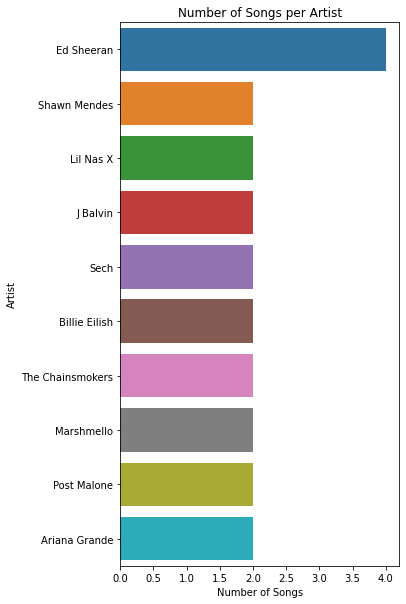

In [23]:
plt.figure(figsize=(5,10))
sns.countplot(y='Artist Name',data=go,order=go['Artist Name'].value_counts().head(10).index).set(title='Number of Songs per Artist',xlabel='Number of Songs',ylabel='Artist')

* Among the top 50 songs, 4 of them belongs to Ed Sheeran. 
* 2 more than the next runner-ups.
* So the most listened artist is Ed Sheeran.

[Text(0.5, 1.0, 'Number of Songs per Genre'),
 Text(0.5, 0, 'Number of Songs'),
 Text(0, 0.5, 'Genre')]

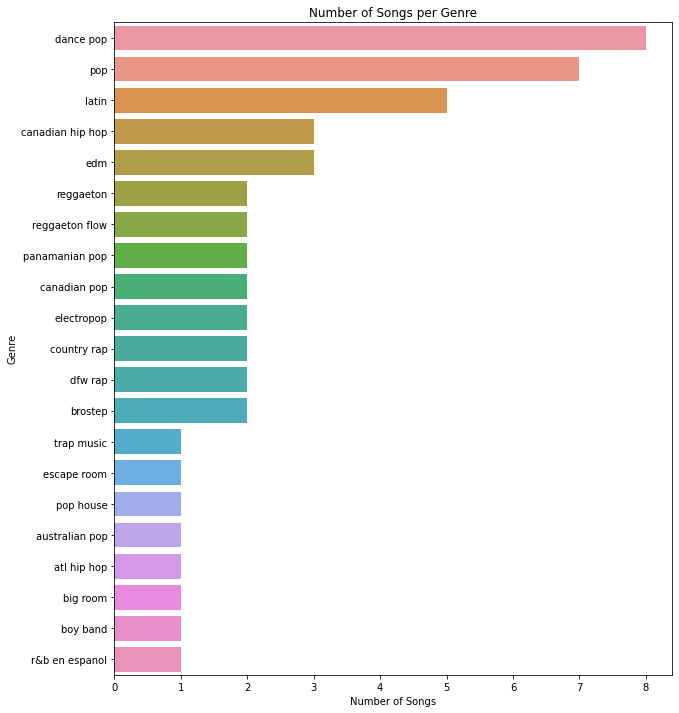

In [24]:
plt.figure(figsize=(10,12))
sns.countplot(y='Genre',data=go,order=go['Genre'].value_counts().index).set(title='Number of Songs per Genre',xlabel='Number of Songs',ylabel='Genre')

* As it turns out, Dance pop is more pop than pop and it is also the most listened genre.

# Artist vs Genre

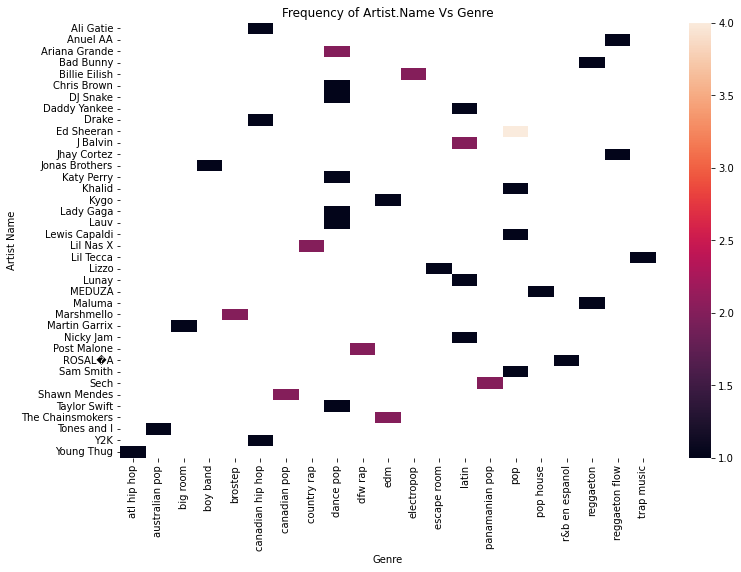

In [43]:
go1 = go.groupby(["Artist Name", "Genre"])["Track Name"].aggregate("count").reset_index()
go1 = go1.pivot('Artist Name', 'Genre', 'Track Name')

plt.figure(figsize=(12,8))
sns.heatmap(go1)
plt.title("Frequency of Artist.Name Vs Genre")
plt.show()

# Best Dance Songs

In [46]:
go[['Track Name','Artist Name','Genre','Danceability']].sort_values(by='Danceability',ascending=False).head(10)


,Track Name,Artist Name,Genre,Danceability
43,Talk,Khalid,pop,90
44,Con Altura,ROSAL�A,r&b en espanol,88
8,Old Town Road - Remix,Lil Nas X,country rap,88
38,Sucker,Jonas Brothers,boy band,84
18,Lalala,Y2K,canadian hip hop,84
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,83
26,Dance Monkey,Tones and I,australian pop,82
11,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,dance pop,82
39,"fuck, i'm lonely (with Anne-Marie) - from �13 ...",Lauv,dance pop,81
22,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,81


* here the songs are most danceability

# Beats per Minute Distribution

[Text(0.5, 1.0, 'Beats per Minute Distribution'),
 Text(0.5, 0, 'Beats per Minute'),
 Text(0, 0.5, 'Number of Songs (Normalized)')]

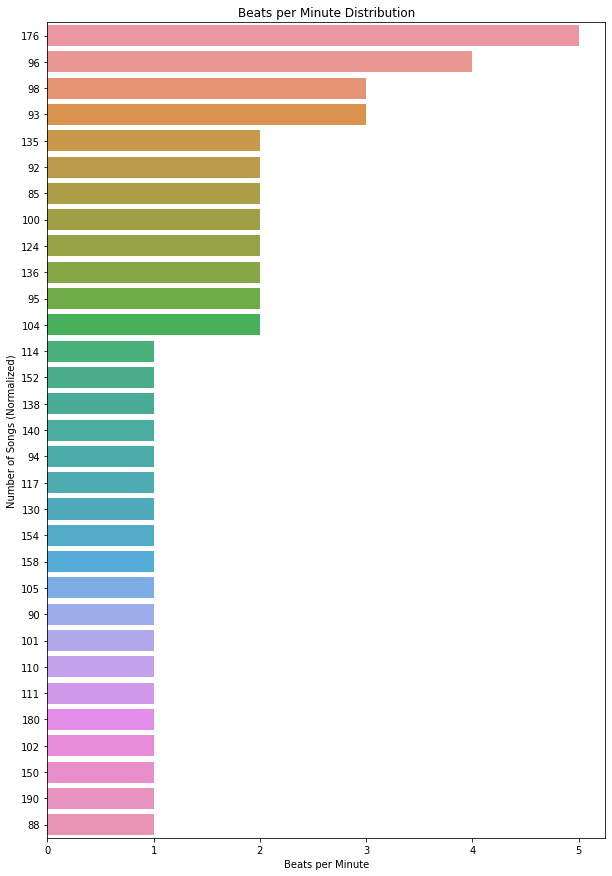

In [5]:
plt.figure(figsize=(10,15))
sns.countplot(y=go['Beats.Per.Minute'],order=go['Beats.Per.Minute'].value_counts().index).set(title='Beats per Minute Distribution',xlabel='Beats per Minute',ylabel='Number of Songs (Normalized)')

* Interestingly, when counts are plotted using bar plot, it can be seen that 176 is something special, 
having the most songs among other BPMs with 5 songs.

# Energy Distribution

/home/rkmveri/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Energy Distribution'),
 Text(0.5, 0, 'Energy'),
 Text(0, 0.5, 'Number of Songs (Normalized)')]

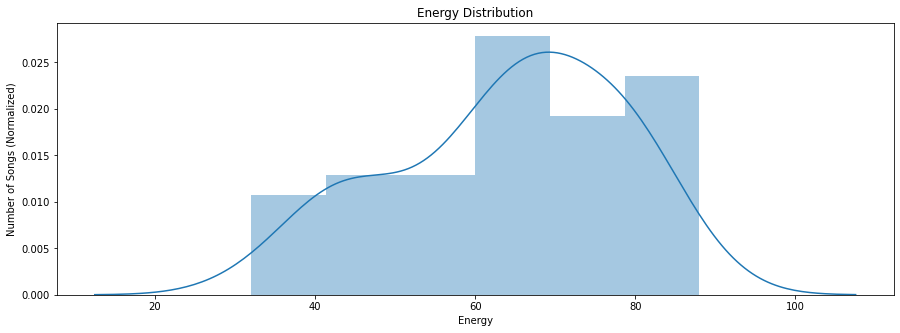

In [15]:
plt.figure(figsize=(15,5))
sns.distplot(go['Energy']).set(title='Energy Distribution',xlabel='Energy',ylabel='Number of Songs (Normalized)')

In [36]:
print('Energy:')
print("Median:",go['Energy'].median())
print("Standard Deviation:",go['Energy'].std())
go['Energy'].describe()

Energy
Median: 66.5
Standard Deviation: 14.231912975379506


count    50.000000
mean     64.060000
std      14.231913
min      32.000000
25%      55.250000
50%      66.500000
75%      74.750000
max      88.000000
Name: Energy, dtype: float64

* most of the values in the range of 55.25 to 74.75.  the most preferred songs are those with medium-high energy, 66.5 with standard deviation of 14.23.

# Danceability Distribution

/home/rkmveri/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Danceability Distribution'),
 Text(0.5, 0, 'Danceability'),
 Text(0, 0.5, 'Number of Songs (Normalized)')]

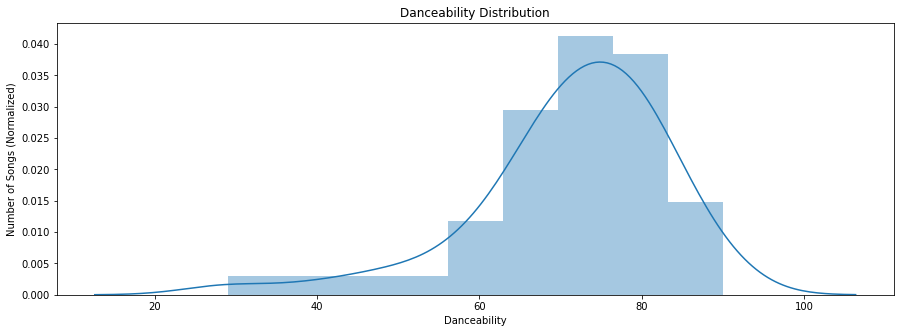

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(go['Danceability']).set(title='Danceability Distribution', xlabel='Danceability',ylabel='Number of Songs (Normalized)')

In [21]:
temp_param = 'Danceability'
print(temp_param)
print("Median:",go[temp_param].median())
print("Standard Deviation:",go[temp_param].std())
go[temp_param].describe()

Danceability
Median: 73.5
Standard Deviation: 11.929880167727022


count    50.00000
mean     71.38000
std      11.92988
min      29.00000
25%      67.00000
50%      73.50000
75%      79.75000
max      90.00000
Name: Danceability, dtype: float64

* According to the graph, this parameter might be of scale 0 to 100. If so, then the listeners prefer medium-high from 67 to 79.75 danceability with median 73.5 and a sharp preference with standard deviation of 11.9298

# Loudness Distribution

/home/rkmveri/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Loudness Distribution'),
 Text(0.5, 0, 'Loudness'),
 Text(0, 0.5, 'Number of Songs (Normalized)')]

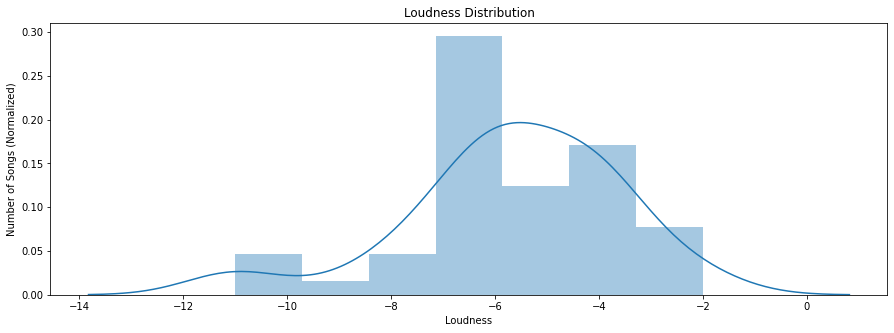

In [26]:
plt.figure(figsize=(15,5))
sns.distplot(go['Loudness']).set(title='Loudness Distribution',xlabel='Loudness',ylabel='Number of Songs (Normalized)')

In [28]:
temp_param = 'Loudness'
print(temp_param)
print("Median:",go[temp_param].median())
print("Standard Deviation:",go[temp_param].std())
go[temp_param].describe()

Loudness
Median: -6.0
Standard Deviation: 2.0564482954445356


count    50.000000
mean     -5.660000
std       2.056448
min     -11.000000
25%      -6.750000
50%      -6.000000
75%      -4.000000
max      -2.000000
Name: Loudness, dtype: float64

* The distribution of the loudness is distributed mostly at -6.75 dB to -4.00 dB centered at -6.0 dB, which, coincidentally, is at the medium-high part of the distribution as well.

# Analysing the relationship between energy and loudness

<AxesSubplot:xlabel='Energy', ylabel='Loudness'>

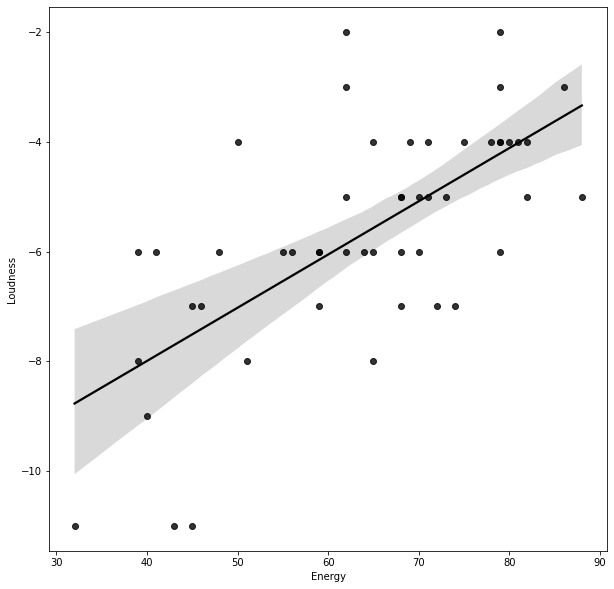

In [42]:
fig = plt.subplots(figsize=(10,10))
sns.regplot(x='Energy', y='Loudness', data=go, color='black')

*Energy and loundness most of peoples like to hear the songs.

In [48]:
go[go.Popularity > 90].groupby(by=['Genre','Artist Name']).agg('count')['Track Name'].sort_values(ascending=False)[:10]

Genre             Artist Name  
dfw rap           Post Malone      2
canadian hip hop  Drake            1
country rap       Lil Nas X        1
electropop        Billie Eilish    1
escape room       Lizzo            1
latin             Daddy Yankee     1
                  Lunay            1
panamanian pop    Sech             1
pop house         MEDUZA           1
reggaeton         Bad Bunny        1
Name: Track Name, dtype: int64

<AxesSubplot:xlabel='Genre,Artist Name'>

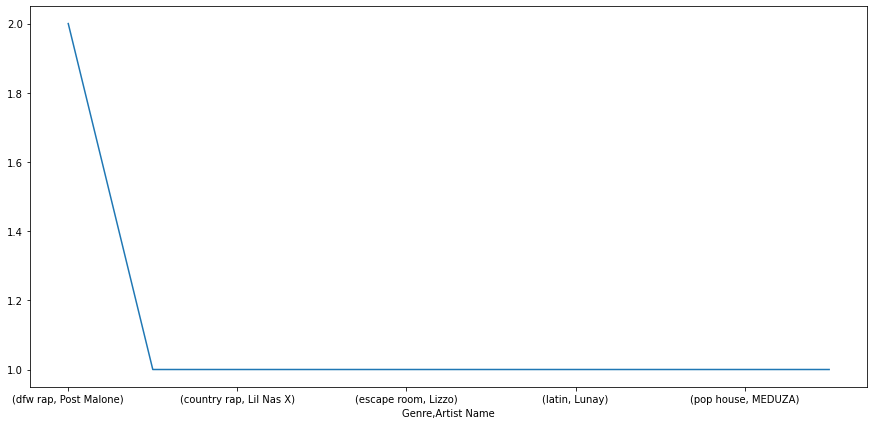

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
go[go.Popularity > 90].groupby(by=['Genre','Artist Name']).agg('count')['Track Name'].sort_values(ascending=False)[:10].plot(ax=ax)